# Set Modules path

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../')) 
sys.path.append(module_path)

# Libraries

In [2]:
import pandas as pd
from src.task4 import missing_values_table, remove_rows_without_customerid, fix_na,\
fix_outlier,aggregate_column, total_data_metric, aggregate_merge_metrics, plot_count_bottom
from src.EDA import  plot_count


# Load non-cleaned data

In [3]:
telecom_data=pd.read_csv("../data/telecom_data.csv")

In [4]:
telecom_data.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
selected_columns=['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)','TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'Handset Type','Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)']

In [6]:
selected_data=telecom_data[selected_columns]

In [7]:
selected_data.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.366496e+10,42.0,5.0,NaN,NaN,Samsung Galaxy A5 Sm-A520F,23.0,44.0
1,3.368185e+10,65.0,5.0,NaN,NaN,Samsung Galaxy J5 (Sm-J530),16.0,26.0
2,3.376063e+10,NaN,NaN,NaN,NaN,Samsung Galaxy A8 (2018),6.0,9.0
3,3.375034e+10,NaN,NaN,NaN,NaN,undefined,44.0,44.0
4,3.369980e+10,NaN,NaN,NaN,NaN,Samsung Sm-G390F,6.0,9.0


# Missing values table 

In [8]:
missing_values_table(selected_data)

Your selected dataframe has 8 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values,Dtype
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
Avg RTT DL (ms),27829,18.6,float64
Avg RTT UL (ms),27812,18.5,float64
MSISDN/Number,1066,0.7,float64
Handset Type,572,0.4,object
Avg Bearer TP DL (kbps),1,0.0,float64
Avg Bearer TP UL (kbps),1,0.0,float64


# remove rows without MSISDN

In [9]:
selected_data=remove_rows_without_customerid(selected_data)

In [10]:
missing_values_table(selected_data)

Your selected dataframe has 8 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values,Dtype
TCP UL Retrans. Vol (Bytes),96192,64.6,float64
TCP DL Retrans. Vol (Bytes),87796,58.9,float64
Avg RTT DL (ms),27644,18.6,float64
Avg RTT UL (ms),27625,18.5,float64


# fix nas by replacing by the mode

In [11]:
selected_data = fix_na(selected_data)

In [12]:
missing_values_table(selected_data)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


# Outliers

<Axes: xlabel='Metrics', ylabel='Values'>

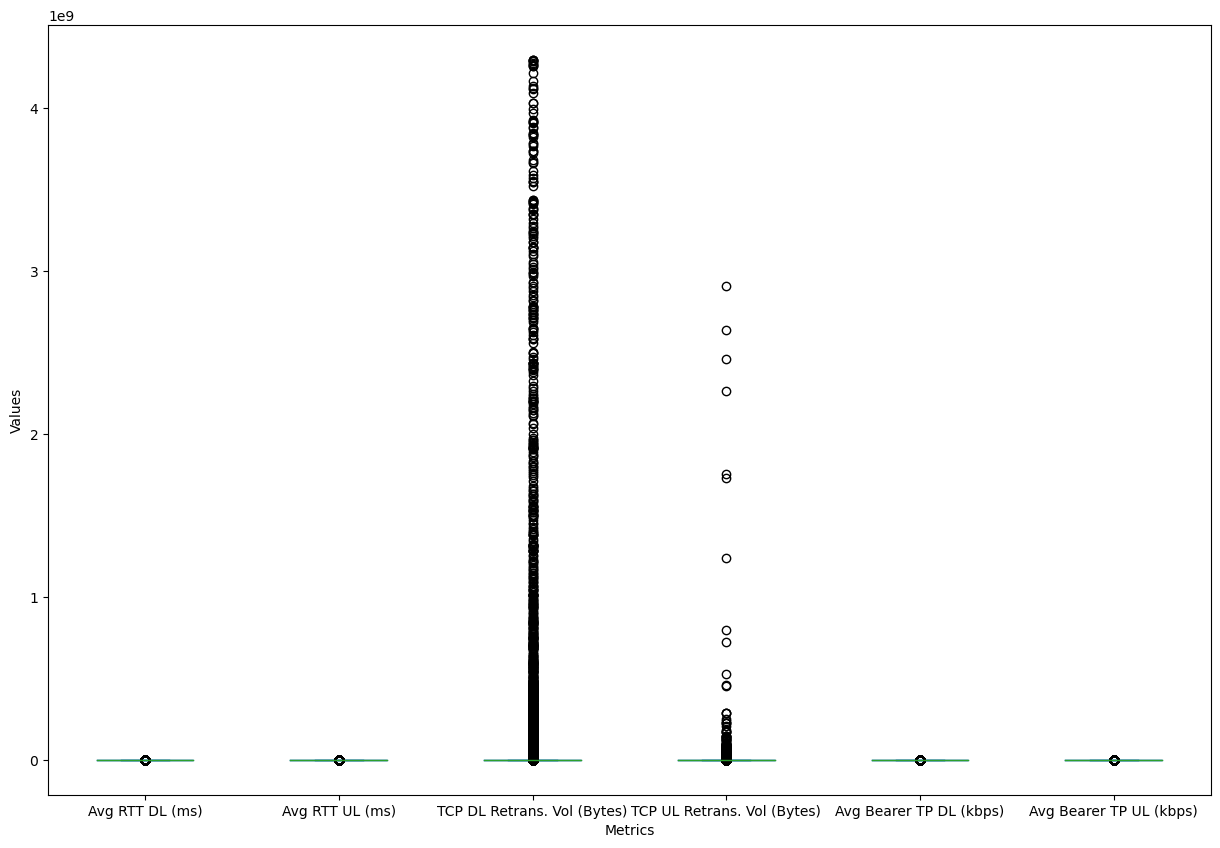

In [13]:
selected_data.drop(["MSISDN/Number","Handset Type"], axis=1).plot(kind="box", 
    figsize=(15,10), xlabel="Metrics", ylabel="Values")

let replace values that are higher than 95% quantile by the mode 

In [14]:
selected_data= fix_outlier(selected_data)

# Feature engineering

let sum up the DL and UL of the corresponding metrics

In [15]:
metrics_dict={

    "RTT": ['Avg RTT DL (ms)', 'Avg RTT UL (ms)'],
    "TCP": [ 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'],
    "TP": ['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

}

In [16]:
selected_data=total_data_metric(selected_data, metrics_dict)

In [17]:
selected_data.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),RTT,TCP,TP
0,3.366496e+10,42.0,5.0,1330.0,1330.0,Samsung Galaxy A5 Sm-A520F,23.0,44.0,47.0,2660.0,67.0
1,3.368185e+10,65.0,5.0,1330.0,1330.0,Samsung Galaxy J5 (Sm-J530),16.0,26.0,70.0,2660.0,42.0
2,3.376063e+10,28.0,5.0,1330.0,1330.0,Samsung Galaxy A8 (2018),6.0,9.0,33.0,2660.0,15.0
3,3.375034e+10,28.0,5.0,1330.0,1330.0,undefined,44.0,44.0,33.0,2660.0,88.0
4,3.369980e+10,28.0,5.0,1330.0,1330.0,Samsung Sm-G390F,6.0,9.0,33.0,2660.0,15.0


# Aggregate metric per user

In [18]:
users_metrics=aggregate_merge_metrics(selected_data, "MSISDN/Number" ,
                     "sum" )

In [19]:
users_metrics.head()

,MSISDN/Number,Handset Type,RTT,TCP,TP
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,46.0,2660.0,76.0
1,3.360100e+10,Apple iPhone 7 (A1778),31.0,2660.0,99.0
2,3.360100e+10,undefined,33.0,2660.0,97.0
3,3.360101e+10,Apple iPhone 5S (A1457),84.0,2396.0,248.0
4,3.360101e+10,Apple iPhone Se (A1723)Apple iPhone Se (A1723),119.0,9373492.0,40475.0


# 10 of the top most frequent



1. TCP values in the dataset.

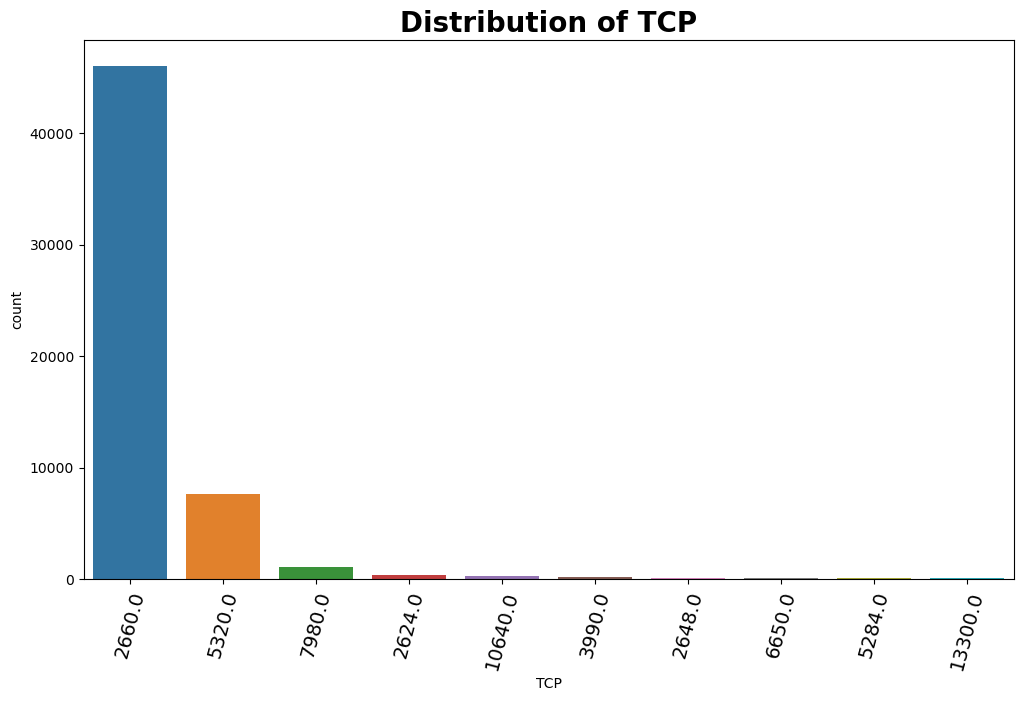

In [20]:
plot_count(users_metrics,"TCP", 10)

2. RTT values in the dataset.

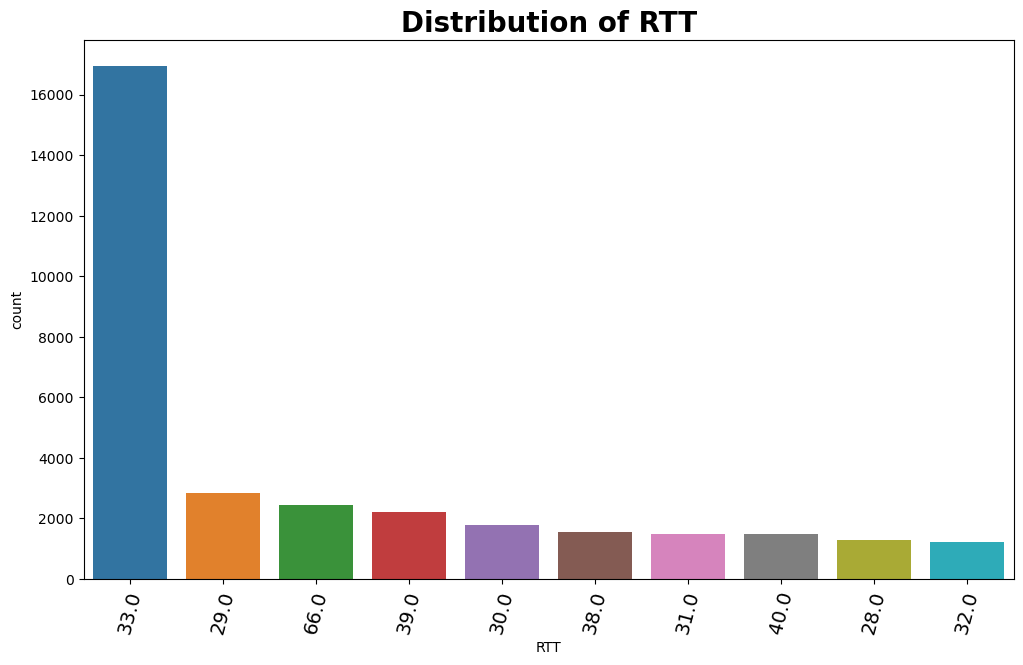

In [21]:
plot_count(users_metrics,"RTT", 10)

3. Throughput values in the dataset.

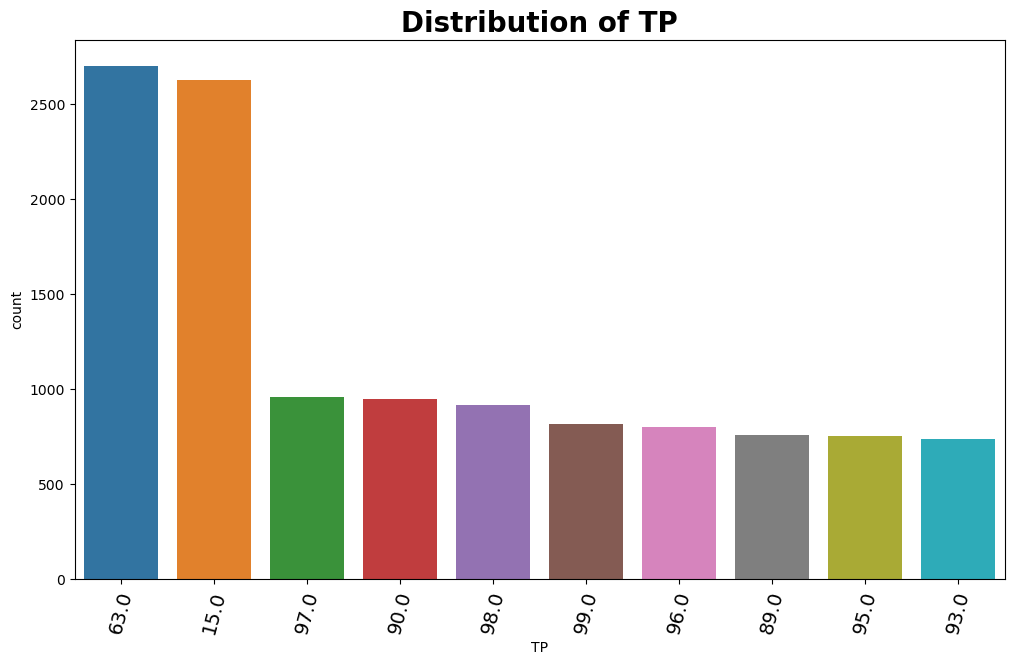

In [22]:
plot_count(users_metrics,"TP", 10)

# 10 bottom most frequent




1. TCP values in the dataset.

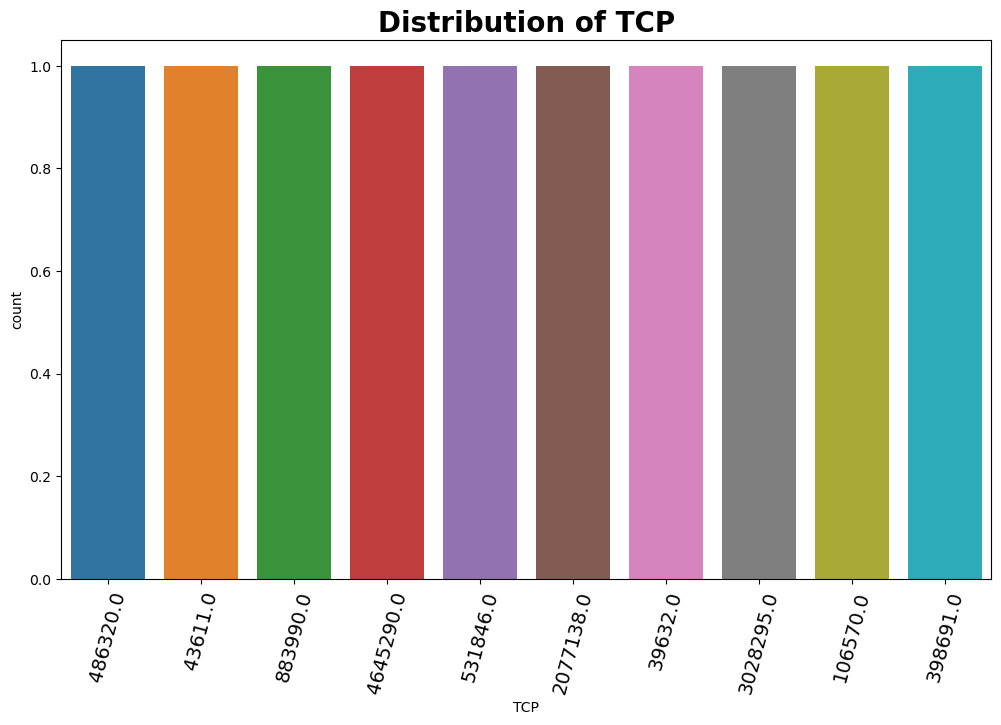

In [23]:
plot_count_bottom(users_metrics,"TCP", 10)

2. RTT values in the dataset.

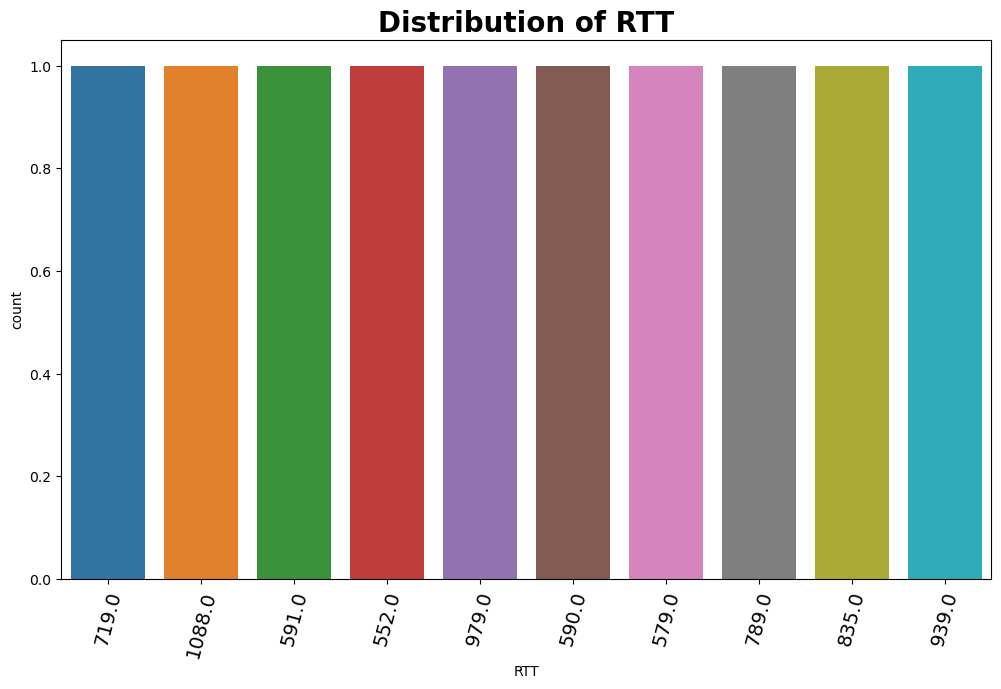

In [24]:
plot_count_bottom(users_metrics,"RTT", 10)

3. Throughput values in the dataset.

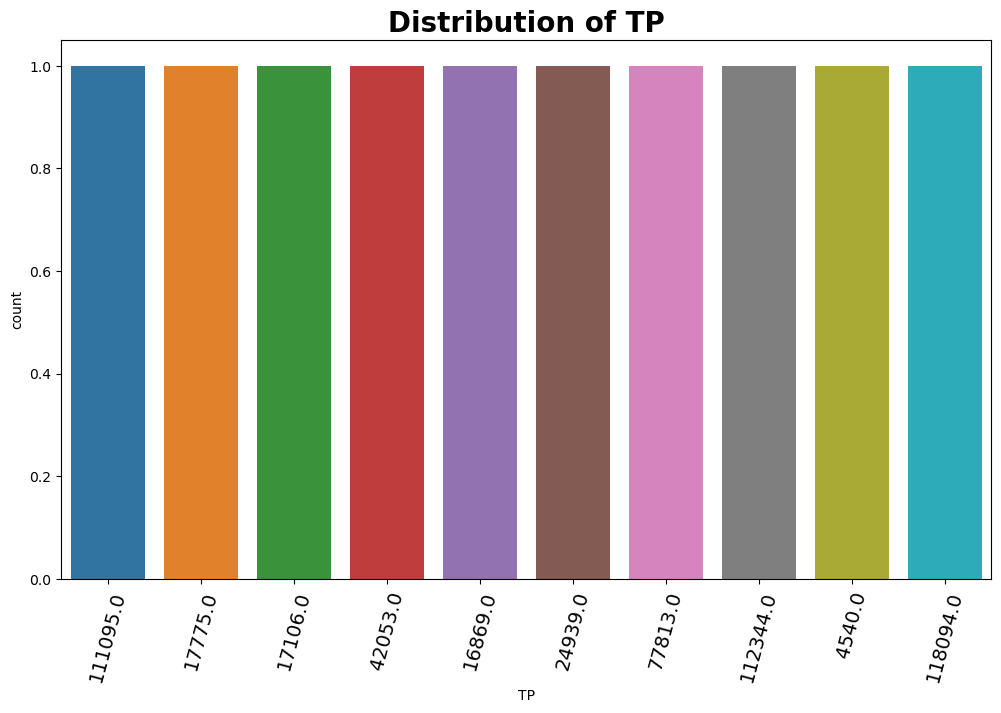

In [25]:
plot_count_bottom(users_metrics,"TP", 10)

# Let perform a k-means clustering (where k = 3) to segment users into groups of experiences 

In [29]:
from src.EDA import normalizer, kmeans,  calculate_group_stats, plot_group_stats

In [30]:
# Let normalize the metrics
experience_metrics=['RTT', 'TCP', 'TP']
normalized_metrics=normalizer(users_metrics, experience_metrics)
# run kmeans and get groups label
clustering= kmeans(normalized_metrics, n_clusters=3)
users_metrics["experience Group"]=clustering.labels_


/home/tousside/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### let save the centers coordinates in a data frame

In [32]:

experience_centers=pd.DataFrame(clustering.cluster_centers_)
experience_centers.columns=["x","y","z"]
experience_centers.to_csv("../data/experience_clusters_centers.csv")

#### Minimum metrics for each experience cluster

In [152]:
group_stat_min=calculate_group_stats(users_metrics, "experience Group", experience_metrics, 'min')
group_stat_min

,RTT,TCP,TP
experience Group,,,
0,0.0,9.700000e+01,0.0
1,372449.0,2.964560e+09,55750026.0
2,24.0,1.310290e+05,63.0


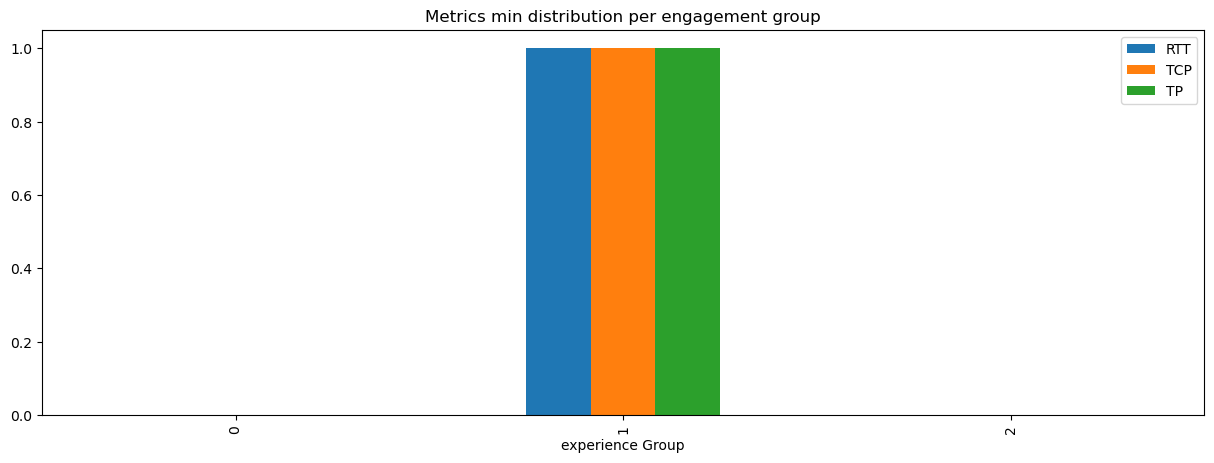

In [153]:
plot_group_stats(group_stat_min, "min")

#### maximum, metrics for each cluster

In [154]:
group_stat_max=calculate_group_stats(users_metrics, "experience Group", experience_metrics, 'max')
group_stat_max

,RTT,TCP,TP
experience Group,,,
0,1088.0,5.358058e+06,269677.0
1,372449.0,2.964560e+09,55750026.0
2,1502.0,5.561121e+07,334591.0


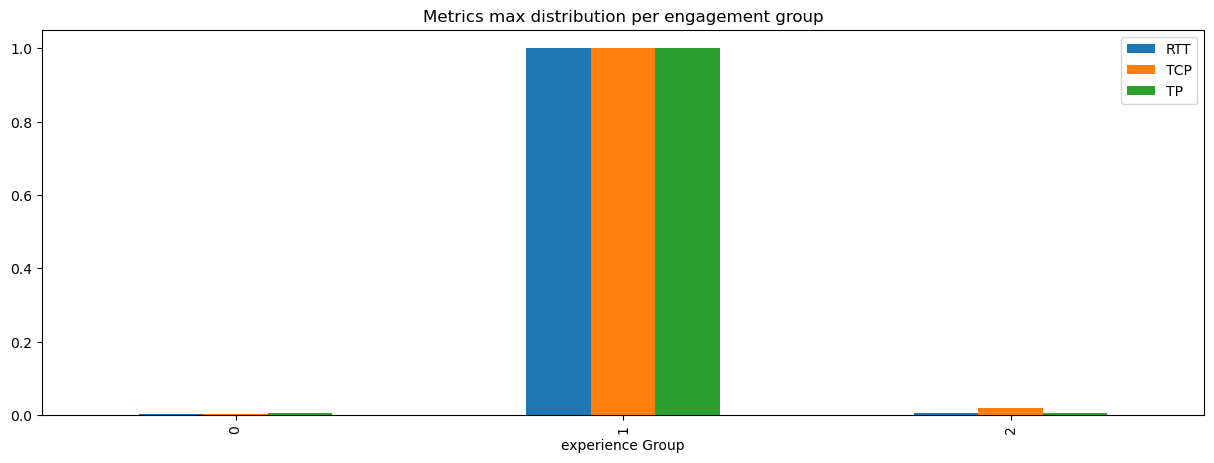

In [155]:
plot_group_stats(group_stat_max, "max")

#### Average metrics for each cluster

In [156]:
group_stat_mean=calculate_group_stats(users_metrics, "experience Group", experience_metrics, 'mean')
group_stat_mean

,RTT,TCP,TP
experience Group,,,
0,69.470025,2.879377e+05,1.040489e+04
1,372449.000000,2.964560e+09,5.575003e+07
2,213.976345,9.013942e+06,6.438712e+04


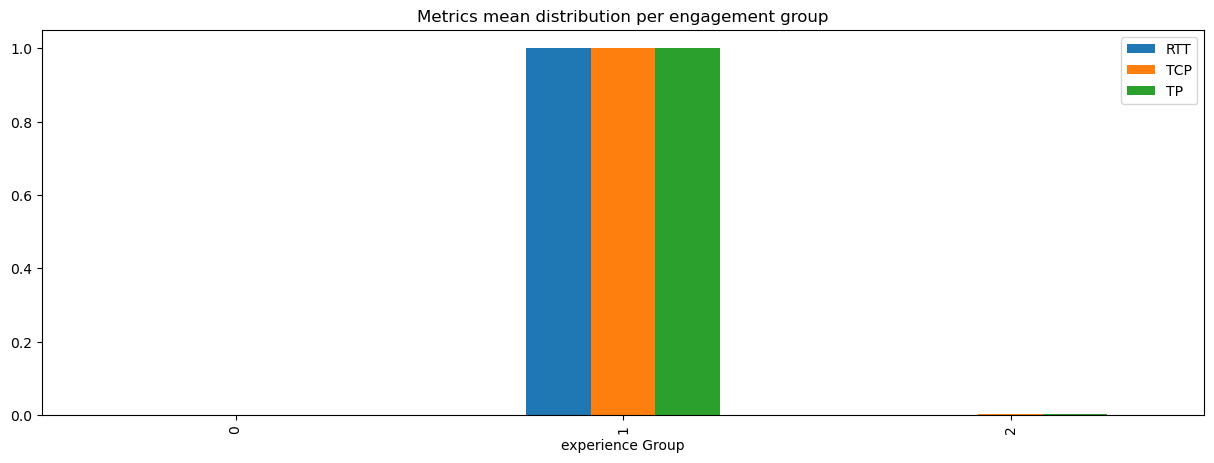

In [157]:
plot_group_stats(group_stat_mean, "mean")

#### total non-normalized metrics for each cluster


In [158]:
grouped_stats_total = calculate_group_stats(users_metrics, 'experience Group', experience_metrics, 'total')
grouped_stats_total

,RTT,TCP,TP
experience Group,,,
0,6613199.0,2.741023e+10,990493734.0
1,372449.0,2.964560e+09,55750026.0
2,1320662.0,5.563405e+10,397397279.0


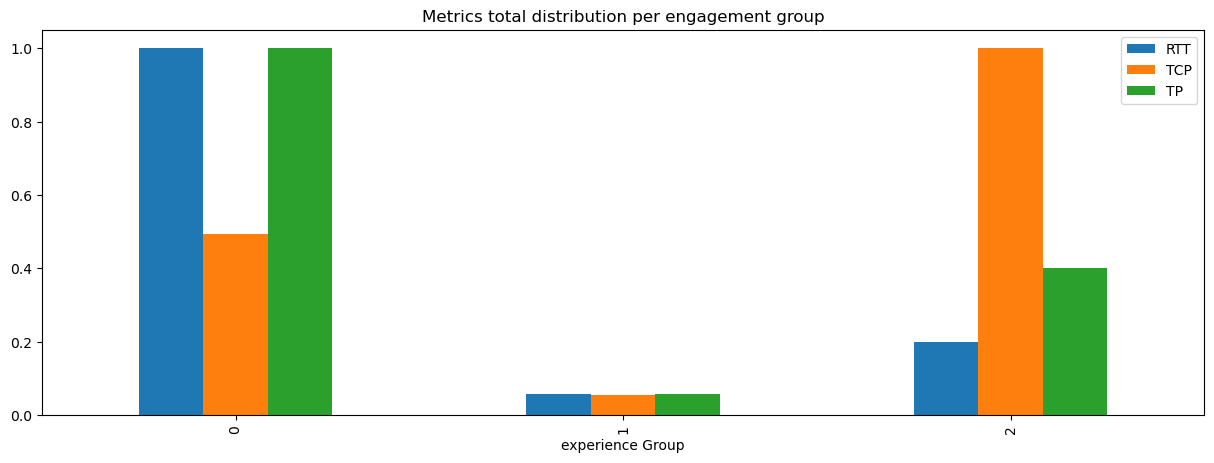

In [159]:
plot_group_stats(grouped_stats_total, "total")

# Interpretation


Group 1 characterized by very high minimal, maximal and mean  RT, TP and RTT , followed by Group 2 and Group 0 is characterized by very low of these metrics . But in terms of total metric the reverse situation.

Overall we can say that Group 1 experienced the worst situations.

###  Let save the final dataset

In [34]:
users_metrics.to_csv("../data/users_experience.csv")